# Lab12

## 0. Prerequisite

In [ ]:
!pip install mypy
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
from mypy import api

@register_cell_magic
def mypy(line, cell):
  for output in api.run(['-c', '\n' + cell] + line.split()):
    if output and not output.startswith('Success'):
      raise TypeError(output)
  get_ipython().run_cell(cell)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 9.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


## 1. Create a class named "ShoppingCart" with the following methods and attributes:

* add_item(name, price, quantity)
* remove_item(name, quantity)
* get_total_price()
* items (dictionary, keys are item names and values are item price and quantities)

In [34]:
first = lambda x: x[0]
second = lambda x: x[1]

class ShoppingCart:
  def __init__(self):
    self.items = dict()

  def add_item(self, name, price, quantity):
    self.items[name] = (price, quantity)

  def remove_item(self, name, quantity):
    if name in self.items:
      if quantity < second(self.items[name]):
        self.items[name] = (first(self.items[name]), second(self.items[name]) - quantity)
      elif second(self.items[name]) == quantity:
        del self.items[name]

  def get_total_price(self):
    return sum([first(v) * second(v) for k, v in self.items.items()])


def main():
  cart = ShoppingCart()
  cart.add_item("Apple", 1.9, 5)
  cart.add_item("Banana", 0.9, 3)
  cart.add_item("Orange", 2.9, 2)
  cart.remove_item("Apple", 2)
  cart.remove_item("Orange", 2)

  print('{:.2f}'.format(cart.get_total_price()))


main()

8.40


## 2. Create a class named "TimeSeriesData" with the following methods and attributes:

* get_max_value()
* get_min_value()
* get_average_value()
* data (list of tuples, each tuple contains a timestamp and a value)

In [35]:

class TimeSeriesData():
  def __init__(self, data):
      self.data = data

  def get_max_value(self):
      return max(value for _, value in self.data)

  def get_min_value(self):
      return min(value for _, value in self.data)

  def get_average_value(self):
      return sum(value for _, value in self.data) / len(self.data)


def main():
  data = [("2023-01-01", 1.0), ("2023-01-02", 2.0), ("2023-01-03", 3.0), ("2023-01-04", 2.5)]

  time_series = TimeSeriesData(data)
  print('{:.2f}'.format(time_series.get_max_value()))
  print('{:.2f}'.format(time_series.get_min_value())) 
  print('{:.2f}'.format(time_series.get_average_value()))

main()

3.00
1.00
2.12


## 3. Create a class named "SimpleLinearRegression" with the following methods and attributes:

* get_slope()
* get_intercept()
* predict(x)
* x (list of floats)
* y (list of floats)

0.58
2.25
5.75
0.58
2.25
5.75


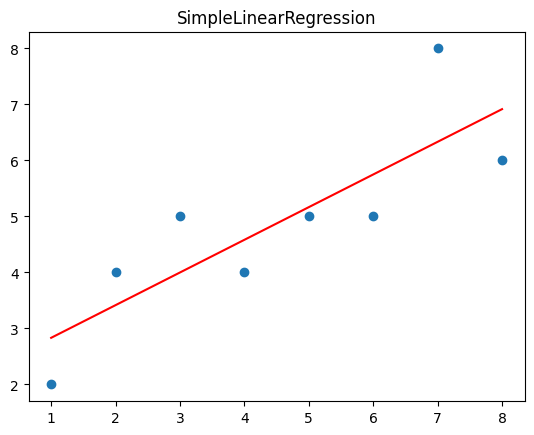

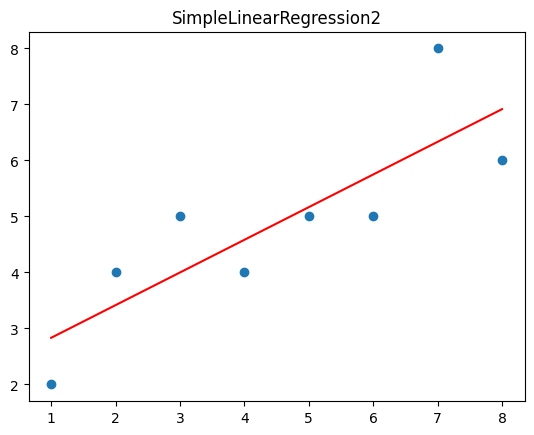

In [ ]:
# first, you can use the matplotlib, numpy, and sklearn modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

class SimpleLinearRegression():  # ax + b = 0
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __fit(self):
    self.X_train = np.array(self.x).reshape(-1,1)
    self.lr = LinearRegression().fit(self.X_train, self.y)

  def get_slope(self):
    self.__fit()
    return self.lr.coef_[0]

  def get_intercept(self):
    self.__fit()
    return self.lr.intercept_

  def predict(self, x):
    return self.get_slope() * x + self.get_intercept()

  def show_plot(self):
    plt.figure("SimpleLinearRegression")
    plt.title("SimpleLinearRegression")
    plt.scatter(self.x, self.y)
    plt.plot(self.x, self.lr.predict(self.X_train), 'r')


# secondly, you can use the least-squares estimation method, 
# you can find the best-fitting line by calculating 
# the slope (a) and intercept (b) using these formulas:

# Slope (a):
# a = (Σ(x*y) - n * mean(x) * mean(y)) / (Σ(x^2) - n * mean(x)^2)

# Intercept (b):
# b = mean(y) - a * mean(x)

class SimpleLinearRegression2():  # ax + b = 0
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def get_slope(self):
    n = len(self.x)
    x_mean = sum(self.x) / n
    y_mean = sum(self.y) / n
    xy = sum(x * y for x, y in zip(self.x, self.y))
    xx = sum(x ** 2 for x in self.x)
    return (xy - n * (x_mean * y_mean)) / (xx - n * x_mean ** 2)

  def get_intercept(self):
    x_mean = sum(self.x) / len(self.x)
    y_mean = sum(self.y) / len(self.y)
    return y_mean - self.get_slope() * x_mean

  def predict(self, x):
    return self.get_slope() * x + self.get_intercept()

  def show_plot(self):
    plt.figure("SimpleLinearRegression2")
    plt.title("SimpleLinearRegression2")
    plt.scatter(self.x, self.y)
    plt.plot(self.x, [self.predict(x) for x in self.x], 'r')


def main():
  x = [1, 2, 3, 4, 5, 6, 7, 8]
  y = [2, 4, 5, 4, 5, 5, 8, 6]

  regression = SimpleLinearRegression(x, y)
  print('{:.2f}'.format(regression.get_slope()))          # a
  print('{:.2f}'.format(regression.get_intercept()))      # b
  print('{:.2f}'.format(regression.predict(6)))           

  regression.show_plot()

  regression2 = SimpleLinearRegression2(x, y)
  print('{:.2f}'.format(regression2.get_slope()))          # a
  print('{:.2f}'.format(regression2.get_intercept()))      # b
  print('{:.2f}'.format(regression2.predict(6)))           

  regression2.show_plot()

main()

